# Fairness policies with continuous-single traces

In this notebook, we compare various heterogeneity-agnostic and heterogeneity-aware LAS, FIFO, and FTF policies, with and without space sharing, on traces with single-GPU jobs only.

## Import statements

In [1]:
from plotting_utils import plot_metric_vs_inverse_lambda_different_num_sub_problems
from plotting_utils import plot_jct_cdf_different_num_sub_problems
from utils import average_jct_fn, get_logfile_paths_helper

## Get list of relevant logfiles and define label mapping

In [2]:
def get_logfile_paths(directory_name, static_trace=False):
    logfile_paths = []
    import re
    for logfile_path in get_logfile_paths_helper(directory_name):
        m = re.match(
            r'.*v100=(\d+)\.p100=(\d+)\.k80=(\d+)/(.*)/'
             'num_sub_problems=(\d+)/seed=(\d+)/'
             'lambda=(\d+\.\d+)\.log', logfile_path)
        if m is None: continue
        v100s = int(m.group(1))
        p100s = int(m.group(2))
        k80s = int(m.group(3))
        policy = m.group(4)
        num_sub_problems = int(m.group(5))
        seed = int(m.group(6))
        l = float(m.group(7))
        logfile_paths.append((v100s, p100s, k80s, policy, seed,
                              l, num_sub_problems, logfile_path))
    return logfile_paths

In [3]:
logfile_paths = sorted(get_logfile_paths(
    "/lfs/1/deepak/logs/num_sub_problems_sweep/"))

In [4]:
labels = {"max_min_fairness_perf": "POP",
          "max_min_fairness_packed": "POP"}

## Plot average JCT vs. input job rate

['max_min_fairness_perf']
Done with [10/180]
Done with [20/180]
Done with [30/180]
Done with [40/180]
Done with [50/180]
Done with [60/180]
Done with [70/180]
Done with [80/180]
Done with [90/180]
Done with [100/180]
Done with [110/180]
Done with [120/180]
Done with [130/180]
Done with [140/180]
Done with [150/180]
Done with [160/180]
Done with [170/180]
Done with [180/180]


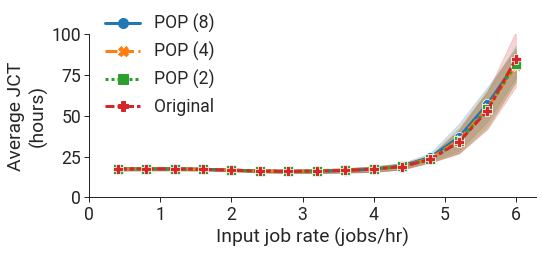

In [5]:
plot_metric_vs_inverse_lambda_different_num_sub_problems(
    logfile_paths,
    labels,
    v100s=32, p100s=32, k80s=32,
    policies=["max_min_fairness_perf"],
    metric_fn=lambda x: average_jct_fn(x, min_job_id=4000, max_job_id=5000),
    metric_label="Average JCT\n(hours)",
    ymax=100.0,
    output_filename="num_sub_problems_sweep/max_min_fairness_perf.pdf"
)

['max_min_fairness_packed']
Done with [10/239]
Done with [20/239]
Done with [30/239]
Done with [40/239]
Done with [50/239]
Done with [60/239]
Done with [70/239]
Done with [80/239]
Done with [90/239]
Done with [100/239]
Done with [110/239]
Done with [120/239]
Done with [130/239]
Done with [140/239]
Done with [150/239]
Done with [160/239]
Done with [170/239]
Done with [180/239]
Done with [190/239]
Done with [200/239]
Done with [210/239]
Done with [220/239]
Done with [230/239]


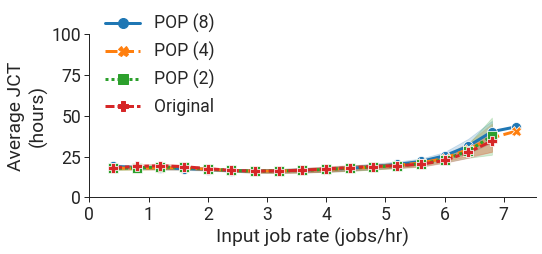

In [6]:
plot_metric_vs_inverse_lambda_different_num_sub_problems(
    logfile_paths,
    labels,
    v100s=32, p100s=32, k80s=32,
    policies=["max_min_fairness_packed"],
    metric_fn=lambda x: average_jct_fn(x, min_job_id=4000, max_job_id=5000),
    metric_label="Average JCT\n(hours)",
    ymax=100.0,
    output_filename="num_sub_problems_sweep/max_min_fairness_packed.pdf"
)

## Plot CDFs of JCT and FTF

['max_min_fairness_perf']
Input job rate: 0.40
max_min_fairness_perf: 17.58
max_min_fairness_perf: 17.58
max_min_fairness_perf: 17.58
max_min_fairness_perf: 17.58


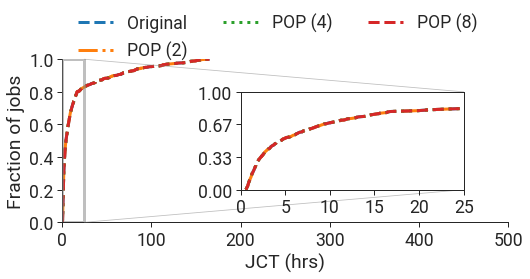

Input job rate: 0.80
max_min_fairness_perf: 17.64
max_min_fairness_perf: 17.64
max_min_fairness_perf: 17.64
max_min_fairness_perf: 17.64


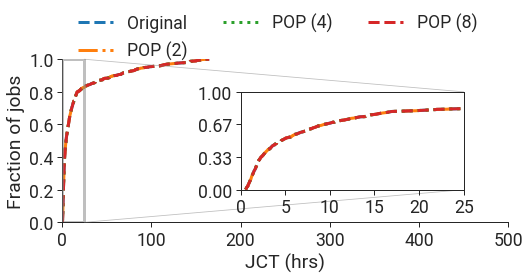

Input job rate: 1.20
max_min_fairness_perf: 17.60
max_min_fairness_perf: 17.60
max_min_fairness_perf: 17.61
max_min_fairness_perf: 17.60


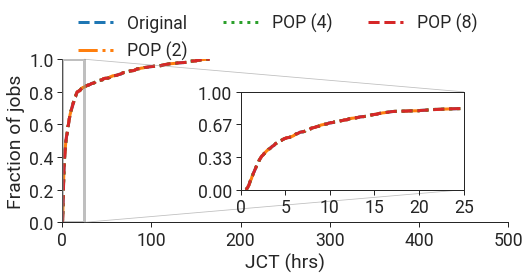

Input job rate: 1.60
max_min_fairness_perf: 17.24
max_min_fairness_perf: 17.24
max_min_fairness_perf: 17.25
max_min_fairness_perf: 17.27


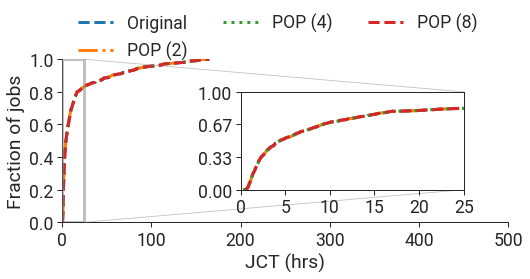

Input job rate: 2.00
max_min_fairness_perf: 16.74
max_min_fairness_perf: 16.77
max_min_fairness_perf: 16.79
max_min_fairness_perf: 16.78


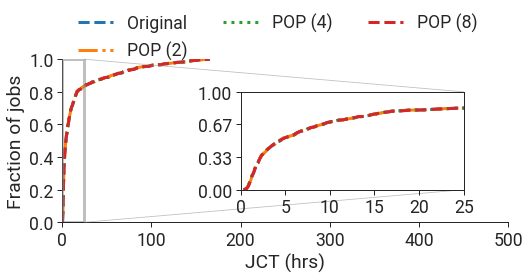

Input job rate: 2.40
max_min_fairness_perf: 16.40
max_min_fairness_perf: 16.42
max_min_fairness_perf: 16.45
max_min_fairness_perf: 16.44


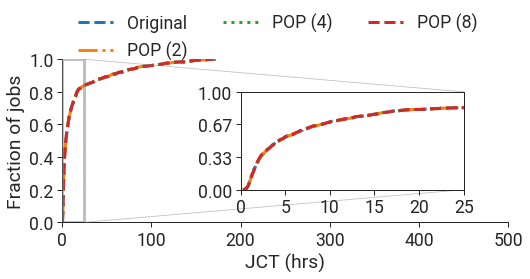

Input job rate: 2.80
max_min_fairness_perf: 16.41
max_min_fairness_perf: 16.45
max_min_fairness_perf: 16.44
max_min_fairness_perf: 16.40


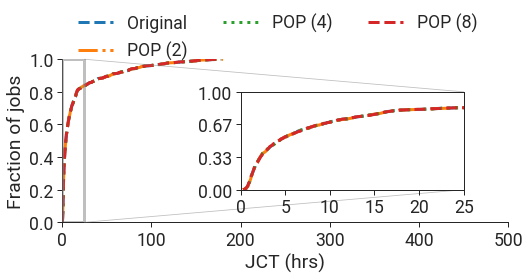

Input job rate: 3.20
max_min_fairness_perf: 16.68
max_min_fairness_perf: 16.71
max_min_fairness_perf: 16.67
max_min_fairness_perf: 16.59


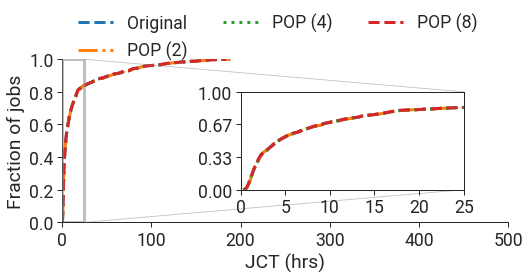

Input job rate: 3.60
max_min_fairness_perf: 17.24
max_min_fairness_perf: 17.27
max_min_fairness_perf: 17.22
max_min_fairness_perf: 17.17


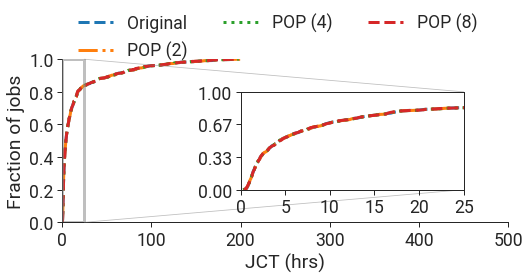

Input job rate: 4.00
max_min_fairness_perf: 18.11
max_min_fairness_perf: 18.11
max_min_fairness_perf: 18.14
max_min_fairness_perf: 18.14


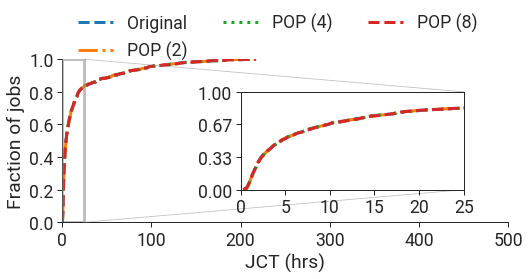

Input job rate: 4.40
max_min_fairness_perf: 20.08
max_min_fairness_perf: 20.23
max_min_fairness_perf: 20.39
max_min_fairness_perf: 20.59


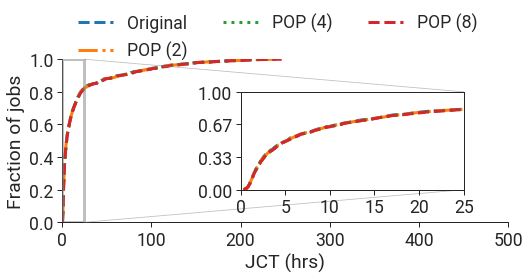

Input job rate: 4.80
max_min_fairness_perf: 25.42
max_min_fairness_perf: 25.59
max_min_fairness_perf: 26.02
max_min_fairness_perf: 27.13


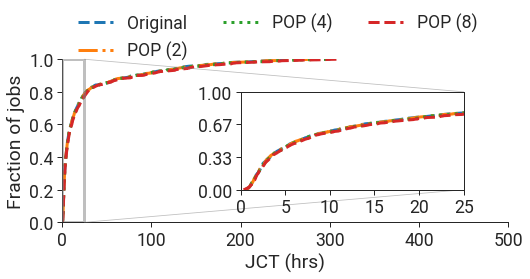

Input job rate: 5.20
max_min_fairness_perf: 38.25
max_min_fairness_perf: 38.74
max_min_fairness_perf: 39.75
max_min_fairness_perf: 41.90


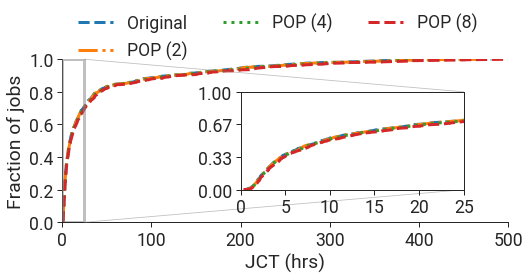

Input job rate: 5.60
max_min_fairness_perf: 60.43
max_min_fairness_perf: 60.89
max_min_fairness_perf: 61.86
max_min_fairness_perf: 63.95


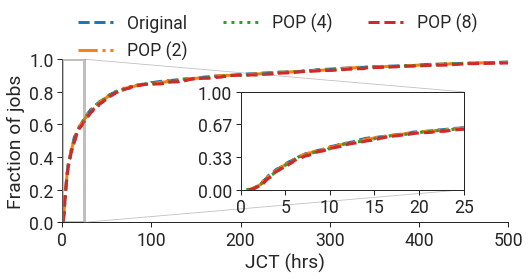

Input job rate: 6.00
max_min_fairness_perf: 84.06
max_min_fairness_perf: 88.35
max_min_fairness_perf: 88.21
max_min_fairness_perf: 89.81


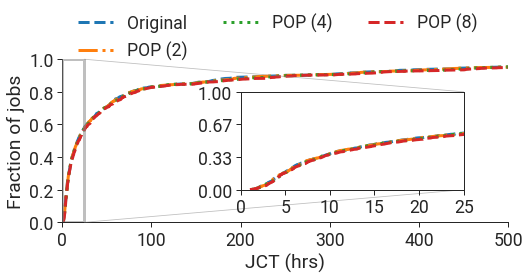

In [7]:
plot_jct_cdf_different_num_sub_problems(
    logfile_paths,
    labels,
    v100s=32, p100s=32, k80s=32,
    max_input_job_rate=6.0,
    policies=["max_min_fairness_perf"],
    all_num_sub_problems=[1, 2, 4, 8],
    min_job_id=4000, max_job_id=5000,
    partition=False,
    output_directory="num_sub_problems_sweep/jct_cdf/max_min_fairness_perf"
)

['max_min_fairness_packed']
Input job rate: 0.40
max_min_fairness_packed: 18.19
max_min_fairness_packed: 17.84
max_min_fairness_packed: 18.02
max_min_fairness_packed: 18.93


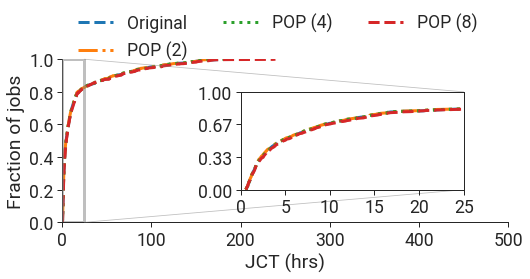

Input job rate: 0.80
max_min_fairness_packed: 18.93
max_min_fairness_packed: 18.22
max_min_fairness_packed: 17.98
max_min_fairness_packed: 18.30


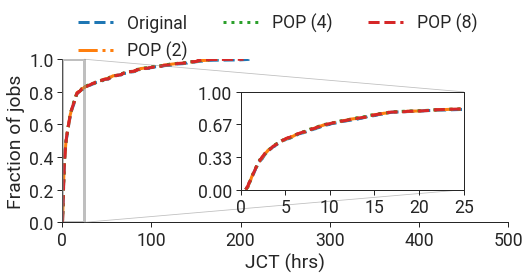

Input job rate: 1.20
max_min_fairness_packed: 19.19
max_min_fairness_packed: 18.52
max_min_fairness_packed: 18.08
max_min_fairness_packed: 18.03


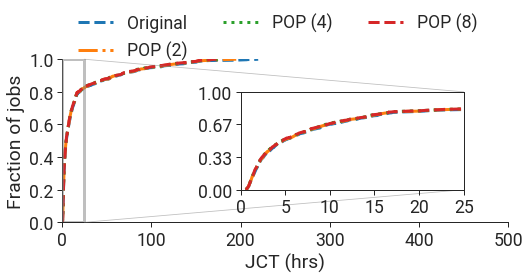

Input job rate: 1.60
max_min_fairness_packed: 18.59
max_min_fairness_packed: 18.17
max_min_fairness_packed: 17.74
max_min_fairness_packed: 17.57


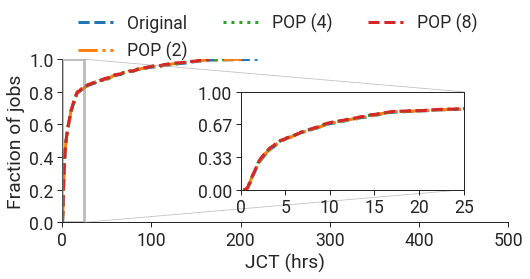

Input job rate: 2.00
max_min_fairness_packed: 17.46
max_min_fairness_packed: 17.27
max_min_fairness_packed: 17.13
max_min_fairness_packed: 17.04


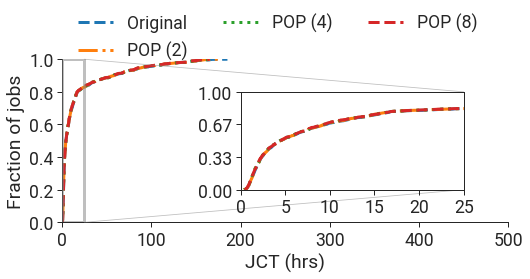

Input job rate: 2.40
max_min_fairness_packed: 16.70
max_min_fairness_packed: 16.66
max_min_fairness_packed: 16.63
max_min_fairness_packed: 16.61


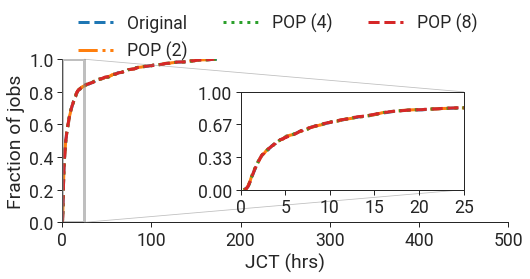

Input job rate: 2.80
max_min_fairness_packed: 16.58
max_min_fairness_packed: 16.55
max_min_fairness_packed: 16.58
max_min_fairness_packed: 16.60


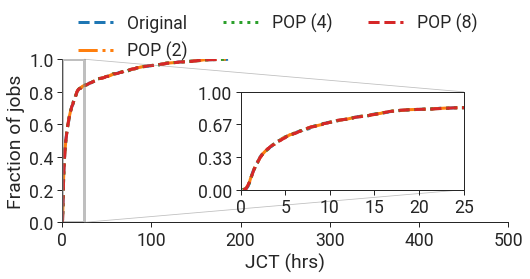

Input job rate: 3.20
max_min_fairness_packed: 16.81
max_min_fairness_packed: 16.77
max_min_fairness_packed: 16.76
max_min_fairness_packed: 16.83


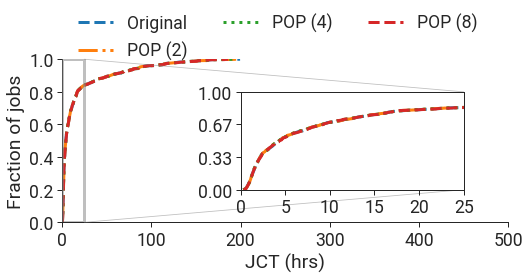

Input job rate: 3.60
max_min_fairness_packed: 17.40
max_min_fairness_packed: 17.25
max_min_fairness_packed: 17.24
max_min_fairness_packed: 17.25


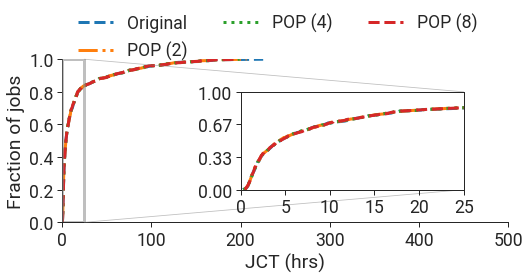

Input job rate: 4.00
max_min_fairness_packed: 18.19
max_min_fairness_packed: 17.92
max_min_fairness_packed: 17.82
max_min_fairness_packed: 17.86


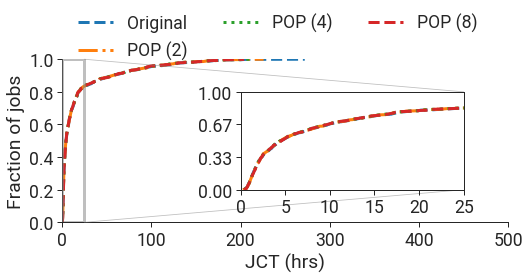

Input job rate: 4.40
max_min_fairness_packed: 19.05
max_min_fairness_packed: 18.76
max_min_fairness_packed: 18.63
max_min_fairness_packed: 18.70


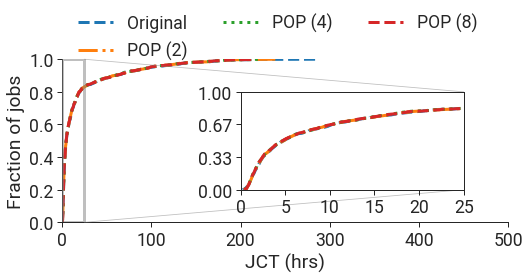

Input job rate: 4.80
max_min_fairness_packed: 19.58
max_min_fairness_packed: 19.49
max_min_fairness_packed: 19.64
max_min_fairness_packed: 20.06


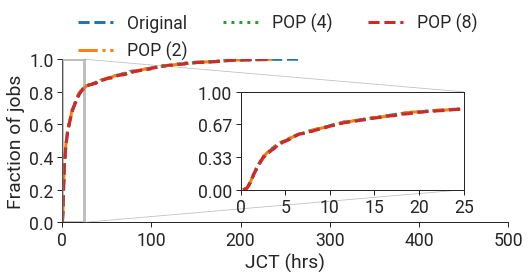

Input job rate: 5.20
max_min_fairness_packed: 20.29
max_min_fairness_packed: 20.39
max_min_fairness_packed: 20.80
max_min_fairness_packed: 21.56


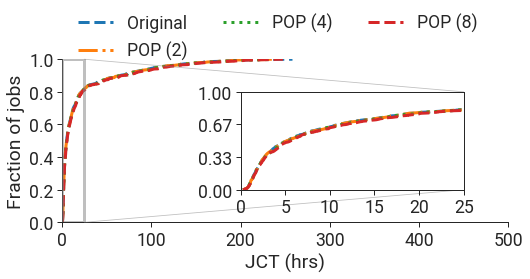

Input job rate: 5.60
max_min_fairness_packed: 21.44
max_min_fairness_packed: 21.80
max_min_fairness_packed: 22.47
max_min_fairness_packed: 23.68


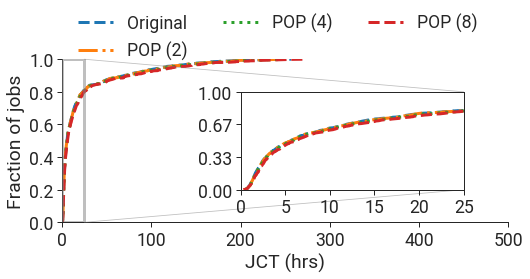

Input job rate: 6.00
max_min_fairness_packed: 24.22
max_min_fairness_packed: 25.17
max_min_fairness_packed: 26.09
max_min_fairness_packed: 28.05


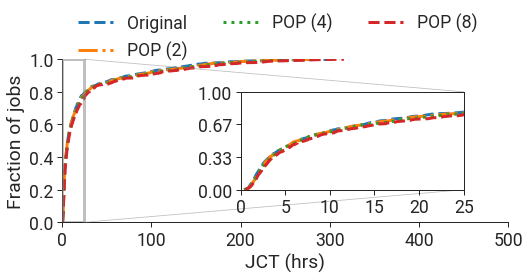

Input job rate: 6.40
max_min_fairness_packed: 31.15
max_min_fairness_packed: 32.64
max_min_fairness_packed: 33.15
max_min_fairness_packed: 35.51


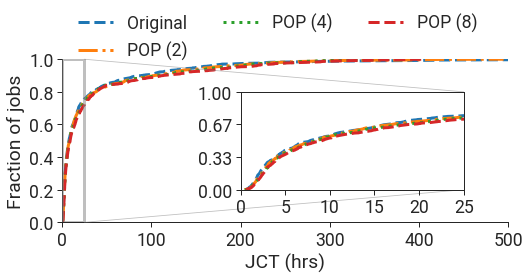

Input job rate: 6.80
max_min_fairness_packed: 39.01
max_min_fairness_packed: 45.55
max_min_fairness_packed: 42.62
max_min_fairness_packed: 45.80


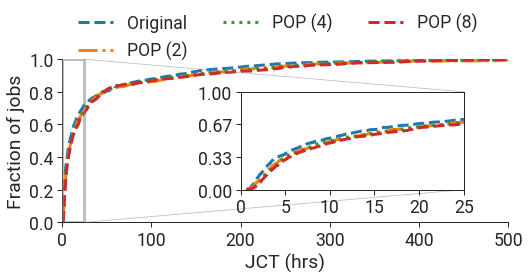

Input job rate: 7.20


/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan


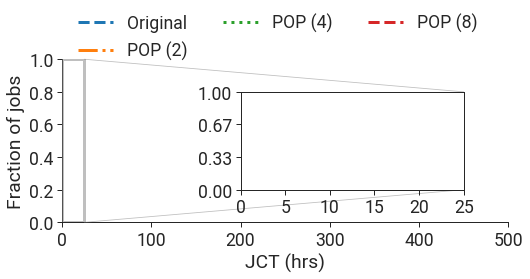

Input job rate: 7.60


/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan


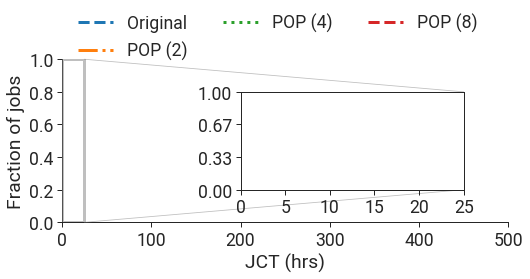

Input job rate: 8.00


/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lfs/1/keshav2/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan
max_min_fairness_packed: nan


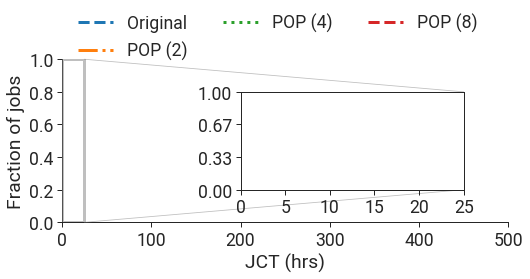

In [8]:
plot_jct_cdf_different_num_sub_problems(
    logfile_paths,
    labels,
    v100s=32, p100s=32, k80s=32,
    max_input_job_rate=8.0,
    policies=["max_min_fairness_packed"],
    all_num_sub_problems=[1, 2, 4, 8],
    min_job_id=4000, max_job_id=5000,
    partition=False,
    output_directory="num_sub_problems_sweep/jct_cdf/max_min_fairness_packed"
)